In [1]:
import numpy  as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


# crawling
from bs4 import BeautifulSoup
from urllib.request import urlopen , urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError

import requests 
import re

print('numpy version  - ' , np.__version__)
print('pandas version - ' , pd.__version__)

numpy version  -  1.20.3
pandas version -  1.3.4


- 영화평점 스크래핑 & 시각화
- https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20220407

In [2]:
try :
    html = urlopen('https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20220407')
    # print(html.read())
except HTTPError as he :
    print('http error')
except URLError as ue :
    print('url error')
else :
    soup = BeautifulSoup(html.read() , 'html.parser')
    print(soup)


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&amp;date=20220407" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/

In [9]:
print('영화 제목을 추출한다면 - ')
print()

soup.find('div' , attrs={'class' : 'tit5'}).a.get_text()

영화 제목을 추출한다면 - 



'씽2게더'

In [11]:
print('평점을 추출한다면 - ')
soup.find('td' , attrs={'class' : 'point'}).get_text()

평점을 추출한다면 - 


'9.40'

In [18]:
print('영화 제목과 평점을 이용한 프레임 작성 - ')

titles = soup.select('.tit5 a')
points = soup.select('.point')

movie_frm = pd.DataFrame({
    'title' : [ title.get_text() for title in titles ] , 
    'point' : [ point.get_text() for point in points]
})
movie_frm

영화 제목과 평점을 이용한 프레임 작성 - 


,title,point
0,씽2게더,9.40
1,패왕별희 디 오리지널,9.31
2,극장판 주술회전 0,9.26
3,해피 투게더,9.18
4,코다,9.15
5,아무도 모른다,8.87
6,스파이더맨: 노 웨이 홈,8.82
7,화양연화,8.80
8,너의 이름은.,8.80
9,하나-비,8.56


In [21]:
print('date_range() - 임의의 날짜를 생성해서 인덱스로 적용 - ')
movie_date = pd.date_range('2022-04-08' , periods = len(movie_frm) )
movie_frm['movie_date'] = movie_date

date_range() - 임의의 날짜를 생성해서 인덱스로 적용 - 


In [25]:
movie_frm.index = movie_date

In [28]:
movie_frm.drop('movie_date' , axis = 1 , inplace = True)

In [34]:
movie_frm['point'] = movie_frm['point'].astype(float)


In [35]:
movie_frm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29 entries, 2022-04-08 to 2022-05-06
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   29 non-null     object 
 1   point   29 non-null     float64
dtypes: float64(1), object(1)
memory usage: 696.0+ bytes


In [36]:
movie_frm

,title,point
2022-04-08,씽2게더,9.40
2022-04-09,패왕별희 디 오리지널,9.31
2022-04-10,극장판 주술회전 0,9.26
2022-04-11,해피 투게더,9.18
2022-04-12,코다,9.15
2022-04-13,아무도 모른다,8.87
2022-04-14,스파이더맨: 노 웨이 홈,8.82
2022-04-15,화양연화,8.80
2022-04-16,너의 이름은.,8.80
2022-04-17,하나-비,8.56


선 그래프를 - 날짜별 포인트 시각화 - 


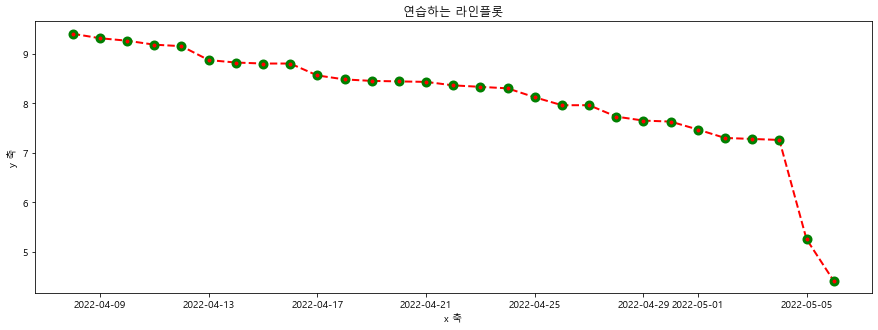

In [39]:
print('선 그래프를 - 날짜별 포인트 시각화 - ')

plt.figure( figsize = (15, 5))



plt.plot(movie_frm.index , movie_frm['point'] , 
         c  = 'red' , 
         lw = '2' , 
         ls = '--' , 
         marker = 'o' , 
         ms = 7 , 
         mec = 'green' , 
         mew = 3,
         mfc = 'red')

plt.xlabel('x 축') 
plt.ylabel('y 축') 
plt.title('연습하는 라인플롯')
plt.show()
plt.close()



평점이 높은 상위 5개의 영화평점을 막대그래프로 시각화 - 


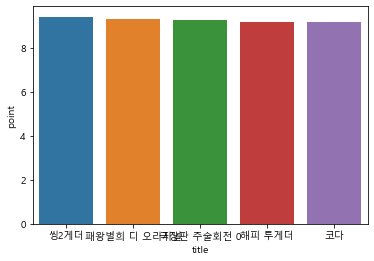

<AxesSubplot:xlabel='title'>

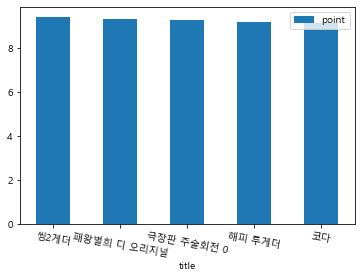

In [53]:
print('평점이 높은 상위 5개의 영화평점을 막대그래프로 시각화 - ')

top5 = movie_frm.sort_values(by = 'point', ascending = False).head(5)
top5

sns.barplot(data = top5, x = top5['title'], y = top5['point'])
plt.show()
plt.close()

movie_frm_sub = movie_frm.sort_values(by = 'point', ascending=False).head(5)
movie_frm_sub.plot(kind = 'bar', x='title', y='point' , rot = -10)


- https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3 [실습]
- 점수(별점) , 리뷰제목, 작성자, 작성날짜, 리뷰내용   -> 데이터 프레임 생성 

- 페이지 처리방법

In [55]:
from time    import sleep , time 
from random  import randint
from IPython.core.display import clear_output


In [62]:
start_time = time()
# start_time

requests = 0 

for idx in range(1, 8) :
    requests += 1 
    sleep( randint(1,6) ) 
    current_time = time()
    elapsed_time = current_time - start_time
    print('request : {} , frequency : {}'.format( requests , requests/elapsed_time))
    clear_output(wait = True)

request : 7 , frequency : 0.24096643072386073


In [66]:
try :
    html = urlopen('https://ad.search.naver.com/search.naver?where=ad&sm=svc_nrs&query=%ED%8C%8C%EC%9D%B4%EC%8D%AC&referenceId=hC%20KZlp0JXossB2Y/PGssssssks-488995&pagingIndex=1')
    # print(html.read())
except HTTPError as he :
    print('http error')
except URLError as ue :
    print('url error')
else :
    soup = BeautifulSoup(html.read() , 'html.parser')
    print(soup)

<!DOCTYPE HTML>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="always" name="referrer"/>
<title>파이썬 :: 네이버 검색광고</title>
<link href="https://ssl.pstatic.net/adimg3.search/imp/nx/power/pc/220318/css/search.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/adimg3.search/imp/nx/moread/power_contents/css/api_setkr_ad_ssl.css" rel="stylesheet" type="text/css"/>
<script charset="UTF-8" src="https://ssl.pstatic.net/adimg3.search/js/clickcr.js" type="text/javascript"></script>
<script charset="UTF-8" src="https://ssl.pstatic.net/adimg3.search/imp/nx/moread/power_contents/190221_1/js/jindo_1.5.3_171116.js?1" type="text/javascript"></script>
<script charset="UTF-8" src="https://ssl.pstatic.net/adimg3.search/ac/nhn.autocomplete.component_130613.js" type="text/javascript"></script>
<script charset="UTF-8" src="https://ssl.pstatic.net/adimg3.search/js/jindo_component.js" type="text/javascript"></script>
<script t

In [69]:
soup.select('.lnk_tit')[0].get_text()

'파이썬 시작하기, 유데미'

In [65]:
pages = [ str(i) for i in range(1, 8) ]
pages

['1', '2', '3', '4', '5', '6', '7']

In [75]:
start_time = time()
# start_time

requests = 0 

title_lst = []

for page in pages :
    
    html = urlopen('https://ad.search.naver.com/search.naver?where=ad&sm=svc_nrs&query=%ED%8C%8C%EC%9D%B4%EC%8D%AC&referenceId=hC%20KZlp0JXossB2Y/PGssssssks-488995&pagingIndex='+page)
    soup = BeautifulSoup(html.read() , 'html.parser')
    
    title_txt = [ a.get_text() for a in soup.select('.lnk_tit') ]
    title_lst.extend( title_txt ) 
    
    requests += 1
    sleep( randint(1,3 ) ) 
    current_time = time()
    elapsed_time = current_time - start_time
    print('request : {} , frequency : {}'.format( requests , requests/elapsed_time))
    clear_output(wait = True)

request : 7 , frequency : 0.5272468055061638


In [76]:
title_lst

['파이썬 시작하기, 유데미',
 '메가스터디 IT 파이썬',
 '그린컴퓨터아트학원공식홈페이지',
 '강남아이티아카데미학원',
 '한국직업능력교육원 시흥캠퍼스',
 '그린컴퓨터아카데미 강남캠퍼스',
 'IT커리어의 첫걸음, 불라방',
 '파이썬, 토폴라',
 '52년 역사 중앙정보처리학원',
 'K디지털 에이콘아카데미 종로',
 '구디아카데미 가산디지털단지점',
 '부천자바 파이선 학원',
 '에듀윌 국비교육원',
 '코리아IT아카데미 김태호',
 '더조은컴퓨터아카데미 공식',
 'SBS아카데미컴퓨터아트학원',
 '빅데이터&핀테크 취업특화교육',
 '쌍용교육센터 IT무료교육',
 '창작을 코딩하다! 위즈라이브',
 '아텐츠 게임아카데미 강남본점',
 '카페24 파이썬',
 '대한상공회의소 충남인력개발원',
 '국비IT교육 KH정보교육원',
 '코드잇 파이썬',
 '강남 그린컴퓨터아카데미',
 'KGIT뱅크  주제희',
 '브랜뉴디자인아카데미',
 '파이썬, 한직교 안산',
 'JUSTCODE 저스트 코드',
 '대한상공회의소서울기술교육센터',
 '데이터분석 직장인 누구나',
 '가비아 컨테이너 호스팅',
 '100%무료교육 휴먼교육센터',
 '훈쌤, N잡 빅데이터 강의',
 '그로우 파이썬 주식분석',
 '파이썬 와이즈코딩',
 'KG아이티뱅크 입학처 김서균',
 '한국소프트웨어인재개발원',
 '컴퓨터방문교육 컴키드홈스쿨',
 '구로 오라클자바교육센터',
 '어소트락 파이썬',
 'KG에듀원 KG아이티뱅크',
 '대학인강 대표 유니와이즈',
 '코리아IT아카데미 문제근',
 '개발자 IT특강 에컴클래스',
 '프로가되는 온라인강의 인프런',
 '쿨사인 파이썬 AI개발',
 'SBS아카데미컴퓨터학원이지일',
 '파이썬 모든에듀',
 '1-2년차 PM으로 성장하기',
 '파이썬 인강 아이티동스쿨',
 '파이썬 인강 인터넷강의',
 'KG아이티뱅크 이유진 쌤!',
 '비전공자를 위한 파이썬',
 'KG아이티뱅크 교육상담 김구',
 'SBS아카데미컴퓨터학원노재림',


#### selenium
- conda install -c conda-forge selenium
- find_element_by_XXXX()
- find_elements_by_XXXX()
- _css_selector , _tag_name , _name , _id , _class_name

#### DOM 내부에 있는 여러개의 요소들 중에서 처음 찾아지는 요소를 추출하는 메소드


- find_element_by_id(id) # id 속성으로 요소를 하나 추출한다.
- find_element_by_name(name) # name속성으로 요소를 하나 추출한다.
- find_element_by_css_selector(query) # CSS 선택자로 요소를 하나 추출한다.
- find_element_by_xpath(query) # XPath를 지정해 요소를 하나 추출한다.
- find_element_by_tag_name(name) # 태그 이름이 name에 해당하는 요소를 하나 추출한다.
- find_element_by_link_text(text) # 링크 텍스트로 요소를 하나 추출한다.
- find_element_by_partial_link_text(text) # 링크의 자식요소에 포함돼 있는 텍스트로 요소를 하나 추출한다.
- find_element_by_class_name(name) # 클래스 이름이 name에 해당하는 요소를 하나 추출한다.

#### DOM 내부에 있는 여러개의 요소들을 모두 추출하는 메소드
- find_elements_by_css_selector(query)
- find_elements_by_xpath(query)
- find_elements_by_tag_name(name)
- find_elements_by_class_name(name)
- find_elements_by_partial_link_text(text)

#### DOM 요소에 적용할 수 있는 메소드

- clear() # 글자를 입력할 수 있는 요소의 글자를 지운다.
- click() # 요소를 클릭한다.
- get_attribute(name) # 요소의 속성 중에 name에 해당되는 속성의 값을 추출한다.
- is_displayed() # 요소가 화면에 출력되는지 확인한다.
- is_enabled() # 요소가 활성화 되었는지 확인한다.
- is_selected() # 체크박스 등의 요소가 선택 상태인지 확인한다.
- screenshot(filename) # 화면을 캡처해서 filename으로 저장한다.
- send_keys(value) # 키를 입력한다. 일반적으로 text 데이터를 보낸다. (그러면 특수키는? 아래 참고.)
- submit() # 입력 양식을 전송한다.
- value_of_css_property(name) # name에 해당하는 CSS 속성 값을 추출한다.




In [78]:
from selenium import webdriver

In [81]:
path = './driver/chromedriver.exe'
driver = webdriver.Chrome(path)
driver.get('https://python.org')

In [112]:
li_tags = driver.find_elements_by_css_selector('#top .meta-navigation ul.menu li')
for li in li_tags : 
    print(li.text)
    print()

Python

PSF

Docs

PyPI

Jobs

Community



- https://datalab.naver.com/shoppingInsight/sCategory.naver 
- 클릭 제어

In [114]:
path = './driver/chromedriver.exe'
driver = webdriver.Chrome(path)
driver.get('https://datalab.naver.com/shoppingInsight/sCategory.naver')

In [123]:
li_tags = driver.find_elements_by_css_selector('.rank_top1000_list li')
li_tags

for li in li_tags : 
    print(li.text.split('\n'))
    print('*' * 50)

['1', '원피스']
**************************************************
['2', '트위드자켓']
**************************************************
['3', '트렌치코트']
**************************************************
['4', '바람막이']
**************************************************
['5', '반팔티']
**************************************************
['6', '나이키바람막이']
**************************************************
['7', '셔츠']
**************************************************
['8', '후드집업']
**************************************************
['9', '반바지']
**************************************************
['10', '블라우스']
**************************************************
['11', '롱원피스']
**************************************************
['12', '여성가디건']
**************************************************
['13', '써스데이아일랜드원피스']
**************************************************
['14', '가디건']
**************************************************
['15', '하객원피스']
**************************************************
['16', '맨투맨

In [236]:
next_btn = driver.find_element_by_css_selector('a.btn_page_next')
next_btn.click()

In [193]:

# next_btn.is_enabled()

True

- 1 ~ 25 까지의 내용을 추출 [실습]

In [240]:
driver = webdriver.Chrome(path)
driver.get('https://datalab.naver.com/shoppingInsight/sCategory.naver')

In [253]:
next_btn = driver.find_element_by_css_selector('a.btn_page_next')

item_lst = []


for idx in range(1, 26) :
    li_tags = driver.find_elements_by_css_selector('.rank_top1000_list li')
    
#     for li in li_tags : 
#         print(li.text.split('\n'))

    tmp_lst = [li.text.split('\n') for li in li_tags]
    item_lst.extend(tmp_lst)
    

    
    
    sleep(2)    
    next_btn.click()
    
    

In [254]:
item_lst

[['41', '베네통'],
 ['42', '남자바람막이'],
 ['43', '뷔스티에원피스'],
 ['44', '지고트원피스'],
 ['45', '세인트제임스'],
 ['46', '자켓'],
 ['47', '스포츠브라'],
 ['48', '폴로니트'],
 ['49', '남자봄자켓'],
 ['50', '잇미샤'],
 ['51', '청바지'],
 ['52', '여성팬티'],
 ['53', '여성맨투맨'],
 ['54', '니트원피스'],
 ['55', '여자트렌치코트'],
 ['56', '트위드원피스'],
 ['57', '타미힐피거'],
 ['58', '크롭자켓'],
 ['59', '남자조거팬츠'],
 ['60', '스커트'],
 ['41', '베네통'],
 ['42', '남자바람막이'],
 ['63', '여성봄자켓'],
 ['64', '듀엘'],
 ['65', '롱스커트'],
 ['66', '몽클레어바람막이'],
 ['67', '티셔츠'],
 ['68', '폴로셔츠'],
 ['69', '남자청바지'],
 ['70', '여성블라우스'],
 ['71', '여성바람막이'],
 ['72', '남자경량패딩'],
 ['73', '가죽자켓'],
 ['74', '여자조거팬츠'],
 ['75', '시슬리원피스'],
 ['76', '버버리퀼팅자켓'],
 ['77', '트위드가디건'],
 ['78', '항공점퍼'],
 ['79', '남자팬티'],
 ['80', '발렌시아']]

- https://www.ildong.com/kor/product/list.id?page=1&halt=&prdDisease=&prdCategory=&searchVal=&searchOption=0

In [256]:
driver = webdriver.Chrome(path)


In [286]:
driver.get('https://www.ildong.com/kor/product/list.id?page=1&halt=&prdDisease=&prdCategory=&searchVal=&searchOption=0')

list = driver.find_element_by_class_name('prList')
a_tags = list.find_elements_by_tag_name('a')
sleep(2)
a_tags[0].click()

detail = driver.find_element_by_class_name('detailCnt2')
detail.text

sleep(2)

driver.back()

In [277]:
for page in range(1,3) :
    print('page - ' , page)
    driver.get('https://www.ildong.com/kor/product/list.id?page='+str(page)+'&halt=&prdDisease=&prdCategory=&searchVal=&searchOption=0')
    sleep(3)
    
    list = driver.find_element_by_class_name('prList')
    a_tags = list.find_elements_by_tag_name('a')

    # print( len(a_tags) )
    for idx in range(len(a_tags)) :
        a_tags[idx].click()
        detail = driver.find_element_by_class_name('detailCnt2')
        print( detail.text )
        print('*' * 100) 
        sleep(2)
        
        driver.back()
        
        list = driver.find_element_by_class_name('prList')
        a_tags = list.find_elements_by_tag_name('a')

page -  1
제품특징

간건강에 도움을 주는 밀크씨슬
지친 간을 위한 자연의 선물, 밀크씨슬
※본 제품은 질병의 예방 및 치료를 위한 의약품이 아니며 인체에 유용한 기능성을 가진 원료나 성분을 사용하여 제조·가공한 건강기능식품입니다.


성분/함량

<기능성원료 및 함량>
1일 섭취량(1캡슐) 당
실리마린 : 130 mg
  ※대두, 쇠고기 함유


기능정보

<기능정보>
[실리마린]간 건강에 도움을 줄 수 있음


섭취방법

<섭취량 및 섭취방법>
1일 1회, 1회 1캡슐을 충분한 물과 함께 섭취하십시오.


포장단위

750 mg X 30캡슐(22.5 g)
****************************************************************************************************
제품특징

1. 하루1캡슐: 하루 1캡슐로 간편하게 섭취하는 현대인의 장 건강을 위한 100억 프로바이오틱스(유산균)
2. 4중코팅 특허기술: 유산균 명가 일동제약의 4중 코팅 특허 기술로 장까지 도달하는 프로바이오틱스(건강기능식품)
3. 한국인 맞춤: 한국형 프로바이오틱스 (유산균) 5종함유


성분/함량

프로바이오틱스 10,000,000,000 CFU


기능정보

[프로바이오틱스] 유산균 증식 및 유해균 억제에 도움을 줄 수 있음, 배변 활동 원활에 도움을 줄 수 있음


섭취방법

1일 1회, 1회 1캡슐


포장단위

500mg x 30캡슐/30일분
****************************************************************************************************
제품특징

1. 글루타치온 50%함유된 효모추출물 240mg사용
2. 100%국산 미배아대두발효 추출분말 500mg사용
3. 레몬농축액 함유로 새콤달콤 맛있고 가볍게 즐기는 구미
4. 수용성 커큐민인 네오큐민 함유


포장단위

3g x 8개, 24g
********************

제품특징

1. 스트레스로 인한 피로개선에 도움을 줄 수 있는 홍경천추출물 함유
2. 에너지대사와 에너지 생성에 필수적인 비타민 B군
3. 비타민B1,B2, 나이아신,판토텐산, B6, 엽산,B12, 비오틴 함유


성분/함량

홍경천추출물 200mg, 비타민B1 100mg, 비타민B2 100mg, 나이아신 100mg NE, 판토텐산 100mg, 비타민B6 100mg,
비타민B12 1000μg, 엽산 700μg, 비오틴 1000μg


기능정보

비타민B1: 탄수화물과 에너지 대사에 필요
비타민B2: 체내 에너지 생성에 필요
판토텐산: 지방, 탄수화물, 단백질 대사와 에너지 생성에 필요
비타민B6: 단백질 및 아미노산 이용에 필요, 혈액의 호모시스테인 수준을 정상으로 유지하는데 필요
나이아신: 체내 에너지 생성에 필요
엽산: 세포와 혈액생성에 필요, 태아 신경관의 정상 발달에 필요, 혈액의 호모시스테인 수준을 정상으로 유지하는데 필요
비타민B12: 정상적인 엽산 대사에 필요
비오틴: 지방, 탄수화물, 단백질 대사와 에너지 생성에 필요
홍경천 추출물: 스트레스로 인한 피로개선에 도움을 줄 수 있음


섭취방법

1일 1회, 1회 2정을 물과 함께 섭취하세요


포장단위

700mg x 60정, 30일분/ 병포장
****************************************************************************************************


- 이미지 로컬 저장소에 저장하기

In [281]:
driver.get('https://search.daum.net/search?w=img&nil_search=btn&DA=NTB&enc=utf8&q=%EA%B0%95%EC%95%84%EC%A7%80')

imgs = driver.find_elements_by_css_selector('#imgList > div > a > img')
img_url = []

for img in imgs :
    url = img.get_attribute('src') 
    img_url.append(url)

In [282]:
img_url

['https://search4.kakaocdn.net/argon/0x200_85_hr/6NnkUoRaYIy',
 'https://search3.kakaocdn.net/argon/0x200_85_hr/97Md9q2IUKO',
 'https://search1.kakaocdn.net/argon/0x200_85_hr/LCXjYHWW5jW',
 'https://search4.kakaocdn.net/argon/0x200_85_hr/C1ggo6yxXZI',
 'https://search1.kakaocdn.net/argon/0x200_85_hr/FzVCPKuZeVn',
 'https://search2.kakaocdn.net/argon/0x200_85_hr/HG0lKiAsdVL',
 'https://search1.kakaocdn.net/argon/0x200_85_hr/DN73IfDe0XE',
 'https://search3.kakaocdn.net/argon/0x200_85_hr/4sti2ZMQmC',
 'https://search3.kakaocdn.net/argon/0x200_85_hr/ANVk2buxoLS',
 'https://search4.kakaocdn.net/argon/0x200_85_hr/L7FhwMLI1OA',
 'https://search3.kakaocdn.net/argon/0x200_85_hr/3prqf8k4aG6',
 'https://search3.kakaocdn.net/argon/0x200_85_hr/CtIxhv3KDuj',
 'https://search4.kakaocdn.net/argon/0x200_85_hr/1ybeM9SOgDM',
 'https://search2.kakaocdn.net/argon/0x200_85_hr/FYxa9uqLA6b',
 'https://search2.kakaocdn.net/argon/0x200_85_hr/LSrZSlaGP8b',
 'https://search4.kakaocdn.net/argon/0x200_85_hr/H3TPRNr

In [285]:
import os

img_folder = './scraping_img'

if not os.path.isdir(img_folder) :
    os.mkdir(img_folder)

for index , link in enumerate(img_url) :
    print(index , '-' , link)
    urlretrieve(link , f'./scraping_img/{index}.jpg')

0 - https://search4.kakaocdn.net/argon/0x200_85_hr/6NnkUoRaYIy
1 - https://search3.kakaocdn.net/argon/0x200_85_hr/97Md9q2IUKO
2 - https://search1.kakaocdn.net/argon/0x200_85_hr/LCXjYHWW5jW
3 - https://search4.kakaocdn.net/argon/0x200_85_hr/C1ggo6yxXZI
4 - https://search1.kakaocdn.net/argon/0x200_85_hr/FzVCPKuZeVn
5 - https://search2.kakaocdn.net/argon/0x200_85_hr/HG0lKiAsdVL
6 - https://search1.kakaocdn.net/argon/0x200_85_hr/DN73IfDe0XE
7 - https://search3.kakaocdn.net/argon/0x200_85_hr/4sti2ZMQmC
8 - https://search3.kakaocdn.net/argon/0x200_85_hr/ANVk2buxoLS
9 - https://search4.kakaocdn.net/argon/0x200_85_hr/L7FhwMLI1OA
10 - https://search3.kakaocdn.net/argon/0x200_85_hr/3prqf8k4aG6
11 - https://search3.kakaocdn.net/argon/0x200_85_hr/CtIxhv3KDuj
12 - https://search4.kakaocdn.net/argon/0x200_85_hr/1ybeM9SOgDM
13 - https://search2.kakaocdn.net/argon/0x200_85_hr/FYxa9uqLA6b
14 - https://search2.kakaocdn.net/argon/0x200_85_hr/LSrZSlaGP8b
15 - https://search4.kakaocdn.net/argon/0x200_85_hr